<a href="https://colab.research.google.com/github/HolyTostadora/Tp-final-ia/blob/main/SNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install tensorflow

! pip install --upgrade keras-cv
! pip install --upgrade keras-hub
! pip install --upgrade keras


In [3]:

import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers, models

print(tf.__version__)

2.18.0


In [4]:
#https://www.kaggle.com/datasets/kshitij192/cars-image-dataset/data

In [5]:
# Rutas a las carpetas de entrenamiento y prueba

train_path = "/content/drive/MyDrive/Cars Dataset/train"
test_path = "/content/drive/MyDrive/Cars Dataset/test"

# Crear el dataset de entrenamiento
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',  # Asignará etiquetas basadas en los nombres de las carpetas
    label_mode='int',   # Etiquetas como enteros
    image_size=(300,170),
    batch_size=32,  # Tamaño de lote
    shuffle=True,  # Mezclar las imágenes
)

# Crear el dataset de prueba
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',  # Asignará etiquetas basadas en los nombres de las carpetas
    label_mode='int',   # Etiquetas como enteros
    image_size=(300,170),
    batch_size=32,  # Tamaño de lote
    shuffle=False,  # No mezclar para mantener el orden
)

# Inspeccionar las clases
class_names = train_dataset.class_names
print(f"Clases: {class_names}")
print(f"Batches de entrenamiento: {len(train_dataset)}")
print(f"Batches de prueba: {len(test_dataset)}")


Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.
Clases: ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']
Batches de entrenamiento: 105
Batches de prueba: 26


In [6]:
# Crear el modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(300,170, 3), batch_size=64),
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (64, 300, 170, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (64, 300, 170, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (64, 150, 85, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (64, 150, 85, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (64, 150, 85, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (64, 150, 85, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (64, 75, 42, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (64, 75, 42, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (64, 201600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (64, 128)                   │      25,804,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (64, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (64, 7)                     │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,889,319 (98.76 MB)

 Trainable params: 25,889,319 (98.76 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Normalización de las imágenes (valores entre 0 y 1)
normalization_layer = layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Mejorar el rendimiento con prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Changed 'acc' to 'accuracy' to reflect the correct key in the logs dictionary
    if(logs.get('accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [12]:
epochs = 5

history = model.fit(
  train_dataset,
  epochs=epochs,
  callbacks=[callbacks]
)

Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 1625s 15s/step - accuracy: 0.2254 - loss: 1.8837
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 1606s 15s/step - accuracy: 0.2413 - loss: 1.8709
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 1637s 15s/step - accuracy: 0.3139 - loss: 1.7674
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 1645s 15s/step - accuracy: 0.4403 - loss: 1.5265
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 1600s 15s/step - accuracy: 0.5286 - loss: 1.3044


26/26 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.5638 - loss: 1.3543
Precisión en el conjunto de prueba: 0.52


KeyError: 'val_accuracy'

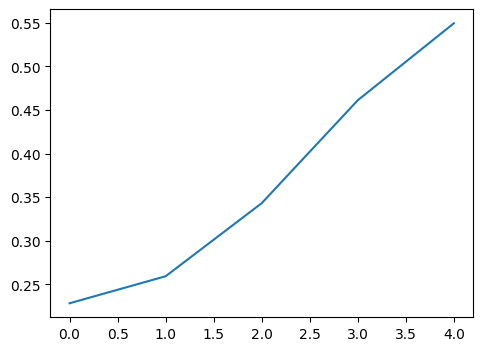

In [13]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

# Graficar el rendimiento
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión del Modelo')

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida del Modelo')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


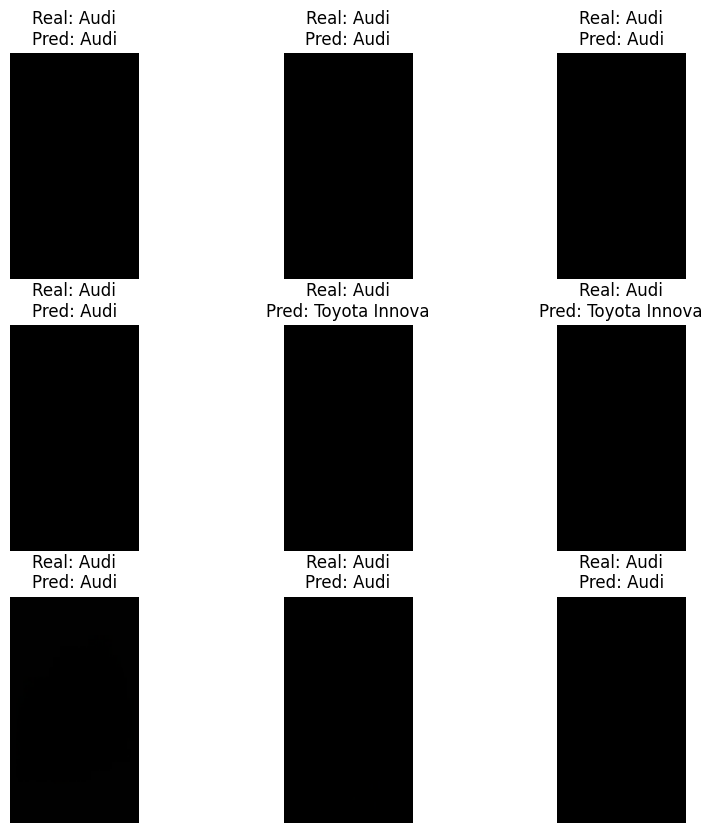

In [14]:
# Mostrar predicciones
for images, labels in test_dataset.take(1):
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = class_names[labels[i]]
        predicted_label = class_names[predicted_classes[i]]
        plt.title(f"Real: {true_label}\nPred: {predicted_label}")
        plt.axis("off")
